In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASL/sign-language-mnist/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASL/sign-language-mnist/sign_mnist_test.csv')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


In [ ]:
#convert to nd numpy array
train = np.array(train_df,dtype='float32')
test = np.array(test_df,dtype='float32')

In [ ]:
X_train = train[:,1:]
X_test = test[:,1:]

y_train = train[:,0]
y_test = test[:,0]

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#One-Hot-Encoding
#LablelEncoder
#LabelBinazier
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

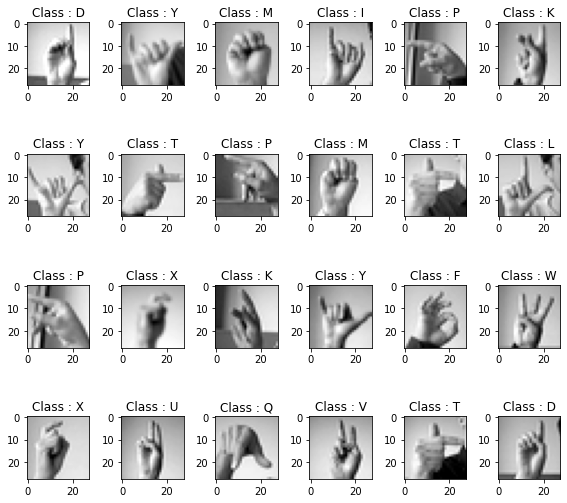

In [ ]:
import random

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

f, ax = plt.subplots(4,6) 
f.set_size_inches(8, 8)

k = random.randint(1,train.shape[0])
for i in range(4):
    for j in range(6):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        ax[i,j].set_title("Class : "+class_names[int(y_train[k])])
        k += 1
    plt.tight_layout()

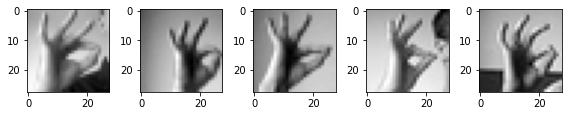

In [ ]:
f, ax = plt.subplots(1,5) 
f.set_size_inches(8, 8)
# k = 0
c = 0
index = 5
while c != 5 :
  k = random.randint(1,train.shape[0])
  if int(y_train[k]) == index:
    ax[c].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
    c += 1
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


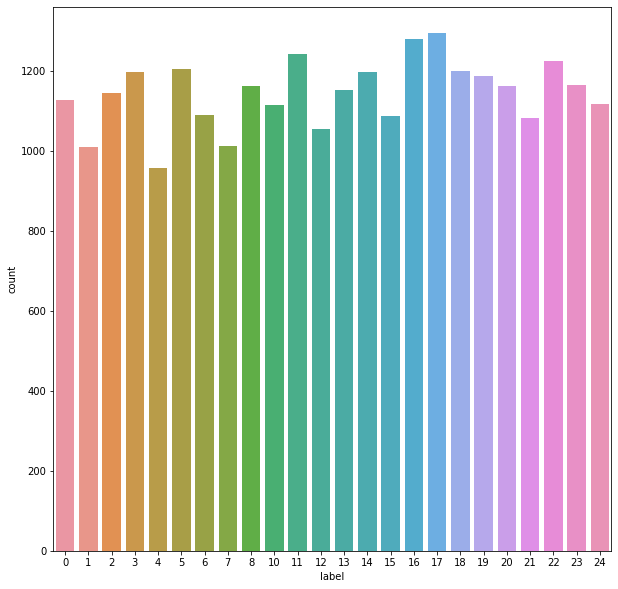

In [ ]:
#مكتبة رسم بياني
import seaborn as sns

plt.figure(figsize = (10,10))
sns.countplot(train_df['label'])

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
def plot_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  acc = history.history['acc']
  val_acc = history.history['val_acc']
  plt.plot(epochs, acc, 'y', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def our_test(model,test_folder_path):
  test_imgs = sorted(glob.glob(test_folder_path+"/*.*", recursive=True))

  test_df = pd.DataFrame()

  n = 28
  for i in test_imgs:
    img = cv2.imread(i, 0)
    re = cv2.resize(img, (n, n))
    arr = np.asarray(re).ravel()
    test_df = test_df.append([arr], ignore_index=True)

  # reshape the data in order to load into the model
  test_arr = test_df.values.reshape(test_df.shape[0], n, n, 1)
  test_arr = test_arr.astype('float32')
  test_arr /= 255

  predictions = model.predict(test_arr)
  # print('predictions: '+str(predictions))
  final_preds = np.argmax(predictions, axis=-1)
  # print('final_preds: '+str(final_preds))

  # dictionary used to convert numerical values to English alphabet
  letter_dict = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, 
                "G":6, "H":7, "I":8, "K":10, "L":11, "M":12, 
                "N":13, "O":14, "P":15, "Q":16, "R":17, "S":18,
                "T":19, "U":20, "V":21, "W":22, "X":23, "Y":24}

  class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

  y_true = np.array([],dtype='int64')

  for i in test_imgs:
    index = i.rfind('/')+1
    file_name = i[index:]
    y_true = np.append(y_true,letter_dict[file_name[0].upper()])
  

  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_true, final_preds)
  print('Accuracy Score = ', accuracy)

  for i in range(len(y_true)):
    if y_true[i] != final_preds[i]:
      print("Misclassified "+str(class_names[y_true[i]])+" as "+str(class_names[final_preds[i]]))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

dropOut = 0.3

model1 = Sequential()

#kernel vs filter: الفلتر هو مجموعة كيرنلات
#Conv2D(kernels_number,kernel_size)
model1.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
#DropOut layers turn off the input from previous layers by 30% randomly
#DropOut layers only work on training not testing
model1.add(Dropout(dropOut))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(dropOut))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(dropOut))

model1.add(Flatten())
model1.add(Dropout(dropOut))

model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(dropOut))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(25, activation = 'softmax'))

model1.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          1

In [ ]:
history1 = model1.fit(X_train, y_train_cat, batch_size = 64, epochs = 100, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/100
429/429 [==============================] - 47s 9ms/step - loss: 3.1810 - acc: 0.0500 - val_loss: 2.4088 - val_acc: 0.2248
Epoch 2/100
429/429 [==============================] - 3s 8ms/step - loss: 2.3084 - acc: 0.2249 - val_loss: 1.3458 - val_acc: 0.6035
Epoch 3/100
429/429 [==============================] - 3s 7ms/step - loss: 1.6548 - acc: 0.4145 - val_loss: 0.9858 - val_acc: 0.6861
Epoch 4/100
429/429 [==============================] - 3s 7ms/step - loss: 1.3958 - acc: 0.5018 - val_loss: 0.8313 - val_acc: 0.6896
Epoch 5/100
429/429 [==============================] - 3s 7ms/step - loss: 1.2227 - acc: 0.5542 - val_loss: 0.7289 - val_acc: 0.7433
Epoch 6/100
429/429 [==============================] - 3s 7ms/step - loss: 1.1063 - acc: 0.5949 - val_loss: 0.6342 - val_acc: 0.7659
Epoch 7/100
429/429 [==============================] - 3s 7ms/step - loss: 1.0268 - acc: 0.6272 - val_loss: 0.5725 - val_acc: 0.8052
Epoch 8/100
429/429 [==============================] - 3s 8ms/step -

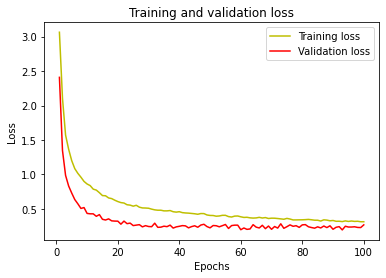

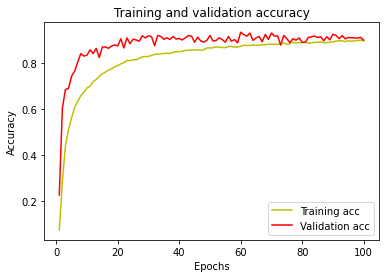

In [ ]:
plot_history(history1)

In [ ]:
our_test(model1,"/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Test1")

Accuracy Score =  0.5416666666666666
Misclassified A as S
Misclassified C as O
Misclassified E as S
Misclassified I as T
Misclassified L as V
Misclassified M as S
Misclassified N as S
Misclassified O as P
Misclassified R as D
Misclassified T as H
Misclassified U as V


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout

sz = 28

model2 = Sequential()

model2.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Convolution2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.40))
model2.add(Dense(units=96, activation='relu'))
model2.add(Dropout(0.40))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=25, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [ ]:
history2 = model2.fit(X_train, y_train_cat, batch_size = 64, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
429/429 [==============================] - 3s 5ms/step - loss: 2.7836 - acc: 0.1433 - val_loss: 1.0352 - val_acc: 0.6500
Epoch 2/10
429/429 [==============================] - 2s 4ms/step - loss: 0.9904 - acc: 0.6460 - val_loss: 0.5077 - val_acc: 0.8507
Epoch 3/10
429/429 [==============================] - 2s 4ms/step - loss: 0.5069 - acc: 0.8161 - val_loss: 0.3563 - val_acc: 0.8832
Epoch 4/10
429/429 [==============================] - 2s 4ms/step - loss: 0.2973 - acc: 0.8997 - val_loss: 0.3025 - val_acc: 0.9105
Epoch 5/10
429/429 [==============================] - 2s 4ms/step - loss: 0.2068 - acc: 0.9302 - val_loss: 0.2961 - val_acc: 0.9133
Epoch 6/10
429/429 [==============================] - 2s 4ms/step - loss: 0.1409 - acc: 0.9551 - val_loss: 0.3106 - val_acc: 0.9133
Epoch 7/10
429/429 [==============================] - 2s 4ms/step - loss: 0.1169 - acc: 0.9615 - val_loss: 0.3725 - val_acc: 0.9004
Epoch 8/10
429/429 [==============================] - 2s 4ms/step - loss: 0.

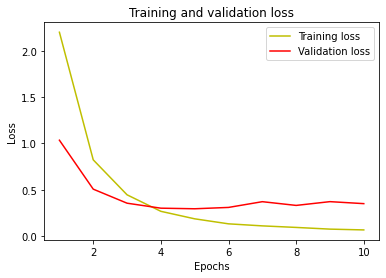

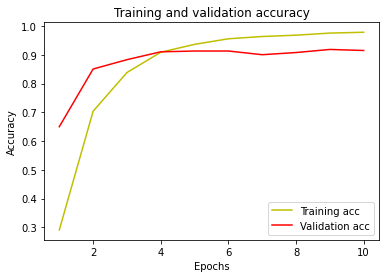

In [ ]:
plot_history(history2)

In [ ]:
our_test(model2,"/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Test1")

Accuracy Score =  0.3333333333333333
Misclassified A as M
Misclassified B as E
Misclassified D as L
Misclassified E as O
Misclassified G as T
Misclassified H as A
Misclassified I as T
Misclassified N as M
Misclassified O as Q
Misclassified Q as H
Misclassified R as T
Misclassified S as M
Misclassified T as Y
Misclassified U as L
Misclassified V as L
Misclassified W as F


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
dropOut = 0.3

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(dropOut))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(dropOut))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(dropOut))

model3.add(Flatten())
model3.add(Dropout(dropOut))

model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(25, activation = 'softmax'))

model3.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)         

In [ ]:
history3 = model3.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 6s 10ms/step - loss: 2.5939 - acc: 0.2355 - val_loss: 4.1024 - val_acc: 0.1095
Epoch 2/10
215/215 [==============================] - 2s 7ms/step - loss: 0.6878 - acc: 0.7550 - val_loss: 2.5535 - val_acc: 0.3087
Epoch 3/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3450 - acc: 0.8800 - val_loss: 0.9337 - val_acc: 0.6966
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.2108 - acc: 0.9273 - val_loss: 0.2925 - val_acc: 0.9152
Epoch 5/10
215/215 [==============================] - 2s 7ms/step - loss: 0.1478 - acc: 0.9487 - val_loss: 0.2924 - val_acc: 0.9110
Epoch 6/10
215/215 [==============================] - 2s 7ms/step - loss: 0.1207 - acc: 0.9595 - val_loss: 0.2777 - val_acc: 0.9193
Epoch 7/10
215/215 [==============================] - 2s 7ms/step - loss: 0.1027 - acc: 0.9667 - val_loss: 0.2914 - val_acc: 0.9194
Epoch 8/10
215/215 [==============================] - 1s 7ms/step - loss: 0

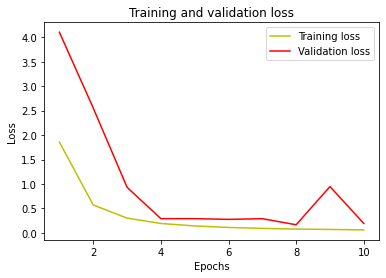

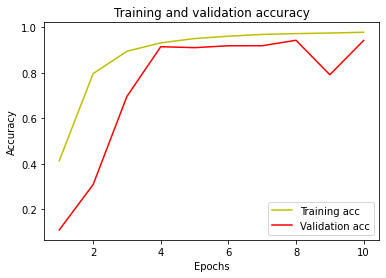

In [ ]:
plot_history(history3)

In [ ]:
our_test(model3,"/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Test1")

Accuracy Score =  0.5
Misclassified A as N
Misclassified B as T
Misclassified E as H
Misclassified G as H
Misclassified I as H
Misclassified M as N
Misclassified O as P
Misclassified Q as H
Misclassified R as T
Misclassified S as N
Misclassified T as H
Misclassified U as D


In [ ]:
model5 = Sequential()

model5.add(Conv2D(16, (3,3), activation='relu', strides=(1, 1),
                     padding='same', input_shape=(28,28,1)))
model5.add(Conv2D(32, (3,3), activation='relu', strides=(1, 1),
                  padding='same'))
model5.add(Conv2D(64, (3,3), activation='relu', strides=(1, 1),
                  padding='same'))
model5.add(Conv2D(128, (3,3), activation='relu', strides=(1, 1),
                  padding='same'))
model5.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.5))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(25, activation='softmax'))

model5.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [ ]:
history5 = model5.fit(X_train, y_train_cat, batch_size = 256, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
108/108 [==============================] - 6s 45ms/step - loss: 2.0858 - acc: 0.3830 - val_loss: 0.9004 - val_acc: 0.7917
Epoch 2/10
108/108 [==============================] - 5s 42ms/step - loss: 0.0345 - acc: 0.9908 - val_loss: 1.0669 - val_acc: 0.8277
Epoch 3/10
108/108 [==============================] - 5s 43ms/step - loss: 5.6532e-04 - acc: 1.0000 - val_loss: 1.1103 - val_acc: 0.8381
Epoch 4/10
108/108 [==============================] - 4s 41ms/step - loss: 2.3645e-04 - acc: 1.0000 - val_loss: 1.1721 - val_acc: 0.8358
Epoch 5/10
108/108 [==============================] - 4s 41ms/step - loss: 1.4374e-04 - acc: 1.0000 - val_loss: 1.2207 - val_acc: 0.8371
Epoch 6/10
108/108 [==============================] - 5s 45ms/step - loss: 9.2219e-05 - acc: 1.0000 - val_loss: 1.2531 - val_acc: 0.8363
Epoch 7/10
108/108 [==============================] - 4s 41ms/step - loss: 7.0106e-05 - acc: 1.0000 - val_loss: 1.2866 - val_acc: 0.8399
Epoch 8/10
108/108 [=============================

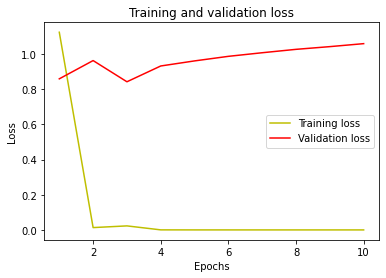

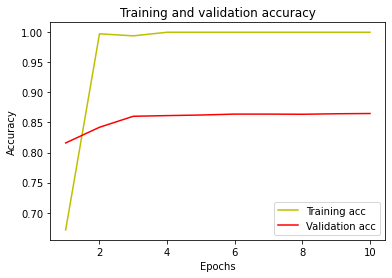

In [ ]:
plot_history(history5)

In [ ]:
our_test(model5,"/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Test1")

Accuracy Score =  0.20833333333333334
Misclassified A as O
Misclassified B as T
Misclassified D as W
Misclassified E as O
Misclassified G as N
Misclassified H as M
Misclassified I as O
Misclassified K as G
Misclassified L as T
Misclassified M as O
Misclassified N as O
Misclassified Q as H
Misclassified R as T
Misclassified S as E
Misclassified U as T
Misclassified V as F
Misclassified W as F
Misclassified X as T
Misclassified Y as S


In [ ]:
model6 = Sequential()
model6.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
model6.add(MaxPooling2D((2,2)))
model6.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model6.add(MaxPooling2D(2,2))
model6.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(64,activation = 'relu'))
model6.add(Dense(25,activation = 'softmax'))

model6.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)               

In [ ]:
history6 = model6.fit(X_train, y_train_cat, batch_size = 256, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
108/108 [==============================] - 2s 13ms/step - loss: 2.8334 - acc: 0.1680 - val_loss: 1.1373 - val_acc: 0.6344
Epoch 2/10
108/108 [==============================] - 1s 9ms/step - loss: 0.7253 - acc: 0.7705 - val_loss: 0.6964 - val_acc: 0.7540
Epoch 3/10
108/108 [==============================] - 1s 9ms/step - loss: 0.2615 - acc: 0.9186 - val_loss: 0.4583 - val_acc: 0.8475
Epoch 4/10
108/108 [==============================] - 1s 9ms/step - loss: 0.0997 - acc: 0.9736 - val_loss: 0.3746 - val_acc: 0.8811
Epoch 5/10
108/108 [==============================] - 1s 9ms/step - loss: 0.0513 - acc: 0.9889 - val_loss: 0.3609 - val_acc: 0.8961
Epoch 6/10
108/108 [==============================] - 1s 9ms/step - loss: 0.0197 - acc: 0.9982 - val_loss: 0.3585 - val_acc: 0.9078
Epoch 7/10
108/108 [==============================] - 1s 9ms/step - loss: 0.0098 - acc: 0.9995 - val_loss: 0.4115 - val_acc: 0.9013
Epoch 8/10
108/108 [==============================] - 1s 9ms/step - loss: 0

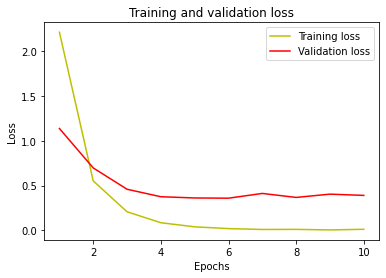

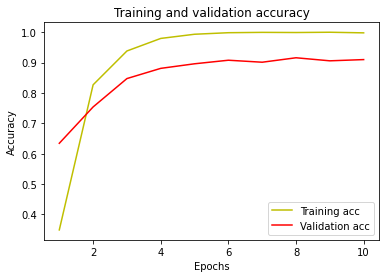

In [ ]:
plot_history(history6)

In [ ]:
our_test(model6,"/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Test1")

Accuracy Score =  0.375
Misclassified A as T
Misclassified B as T
Misclassified D as T
Misclassified E as T
Misclassified G as H
Misclassified I as T
Misclassified K as T
Misclassified M as B
Misclassified N as T
Misclassified O as P
Misclassified P as Y
Misclassified R as T
Misclassified U as T
Misclassified V as X
Misclassified W as F


In [ ]:
del model7
del history7

In [ ]:
model7 = Sequential()

model7.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model7.add(MaxPooling2D(pool_size = (2, 2)))
model7.add(Dropout(dropOut))

model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size = (2, 2)))
model7.add(Dropout(dropOut))

model7.add(Flatten())

model7.add(Dense(25, activation = 'softmax'))

model7.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)             

In [ ]:
history7 = model7.fit(X_train, y_train_cat, batch_size = 16, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
1716/1716 [==============================] - 7s 4ms/step - loss: 1.8727 - acc: 0.4421 - val_loss: 0.3793 - val_acc: 0.8833
Epoch 2/10
1716/1716 [==============================] - 6s 4ms/step - loss: 0.1929 - acc: 0.9397 - val_loss: 0.2925 - val_acc: 0.9081
Epoch 3/10
1716/1716 [==============================] - 6s 4ms/step - loss: 0.0749 - acc: 0.9781 - val_loss: 0.2360 - val_acc: 0.9258
Epoch 4/10
1716/1716 [==============================] - 6s 4ms/step - loss: 0.0422 - acc: 0.9873 - val_loss: 0.2926 - val_acc: 0.9215
Epoch 5/10
1716/1716 [==============================] - 6s 3ms/step - loss: 0.0268 - acc: 0.9922 - val_loss: 0.2457 - val_acc: 0.9417
Epoch 6/10
1716/1716 [==============================] - 6s 3ms/step - loss: 0.0205 - acc: 0.9940 - val_loss: 0.2960 - val_acc: 0.9311
Epoch 7/10
1716/1716 [==============================] - 6s 4ms/step - loss: 0.0203 - acc: 0.9935 - val_loss: 0.2881 - val_acc: 0.9407
Epoch 8/10
1716/1716 [==============================] - 6s 4ms

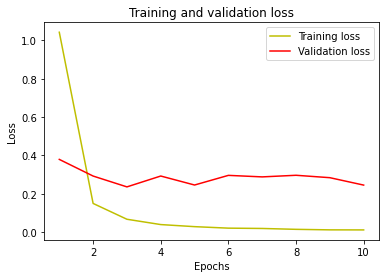

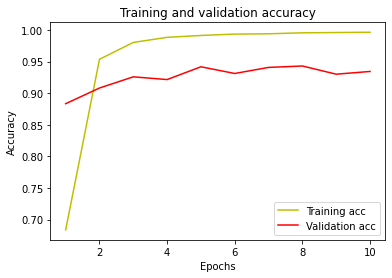

In [ ]:
plot_history(history7)

In [ ]:
our_test(model7,"/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Test1")

Accuracy Score =  0.375
Misclassified A as N
Misclassified B as O
Misclassified E as C
Misclassified I as T
Misclassified K as T
Misclassified M as C
Misclassified O as P
Misclassified Q as H
Misclassified R as T
Misclassified S as C
Misclassified T as P
Misclassified U as T
Misclassified V as T
Misclassified W as F
Misclassified Y as H
